In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

## 1. Scatter Plots



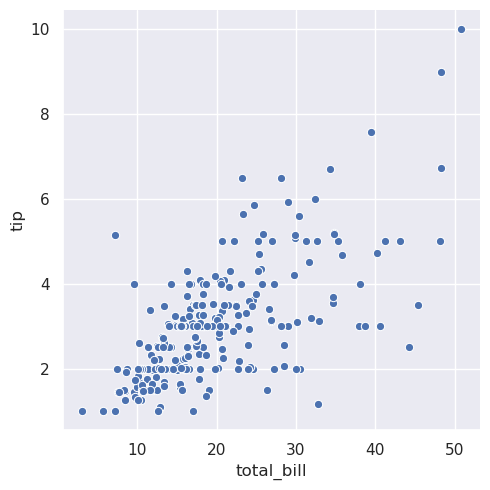

In [2]:
tips = pd.read_csv('../input/myprivatedata/tips.csv')
sns.relplot(x="total_bill", y="tip",color = 'b', data=tips);

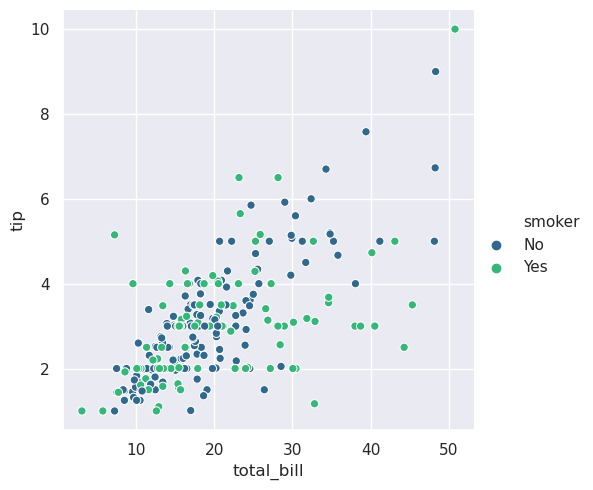

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker",palette = 'viridis', data=tips);

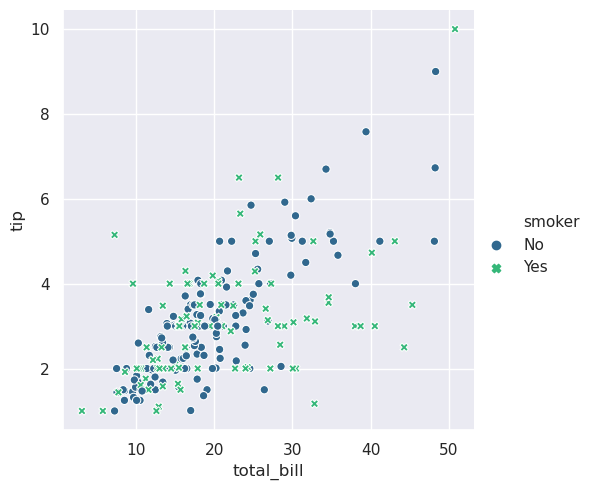

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips,palette = 'viridis');

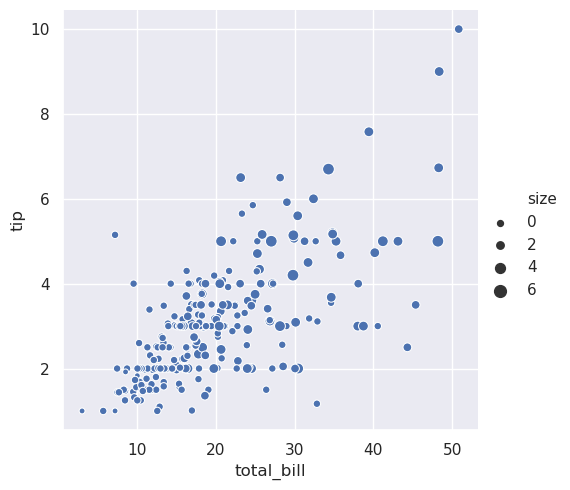

In [7]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

## 2.Line Plots



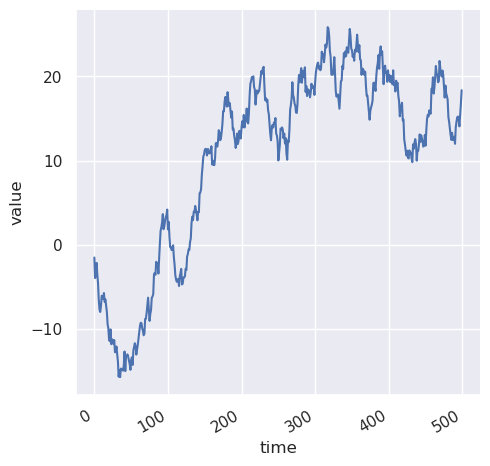

In [9]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()

### Plotting with Date Data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

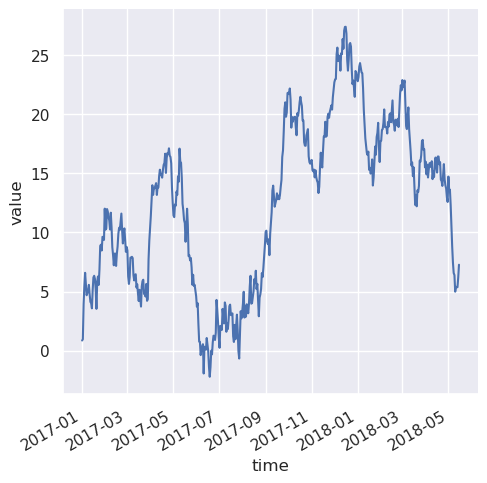

In [22]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Facets

This means that you make multiple axes and plot subsets of the data on each of them:

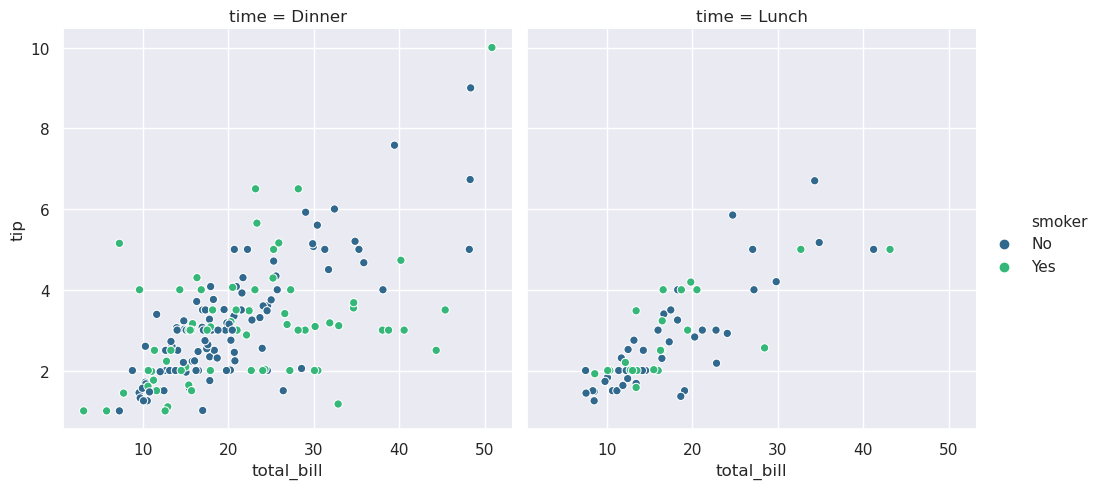

In [23]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips,palette='viridis');

In [26]:
sns.set(style="ticks", color_codes=True)

## Categorical Scatterplots

The default representation of the data in catplot() uses a scatterplot. 

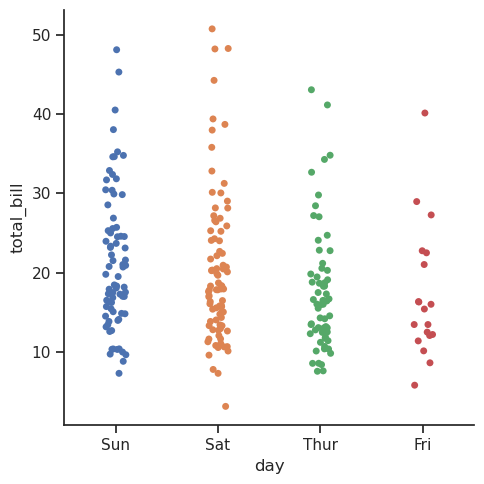

In [27]:
sns.catplot(x="day", y="total_bill", data=tips, jitter = True);

> The jitter parameter controls the magnitude of jitter or disables it altogether:

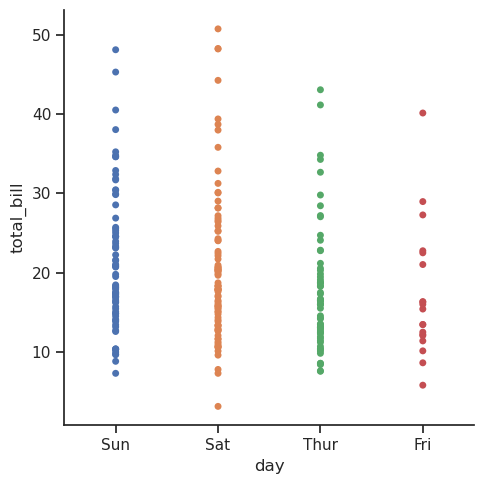

In [28]:
sns.catplot(x="day", y="total_bill", data=tips, jitter = False);

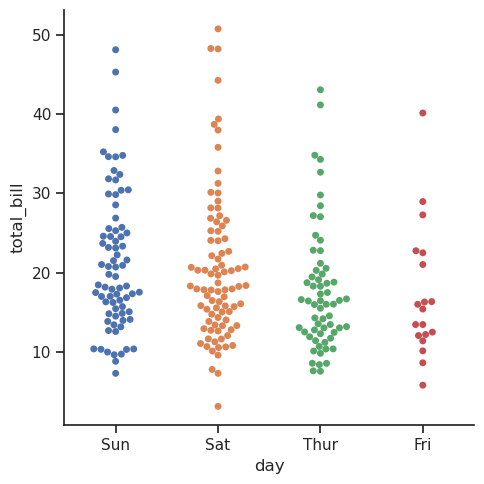

In [29]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

> The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter.

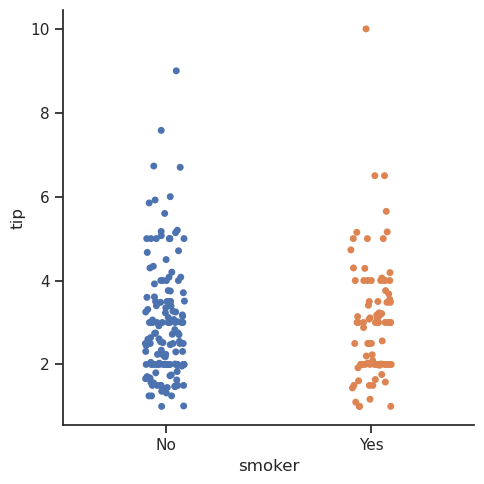

In [32]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

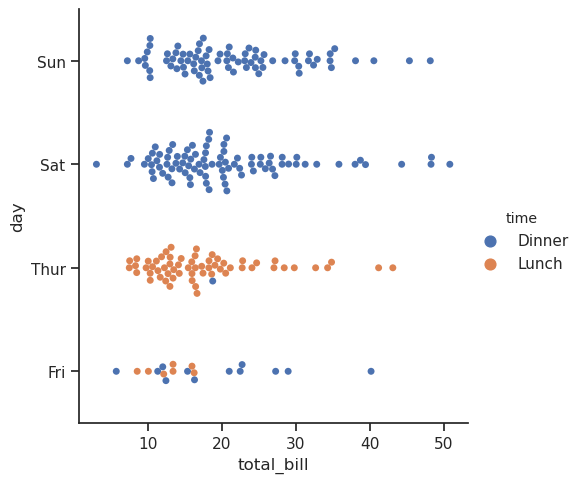

In [33]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

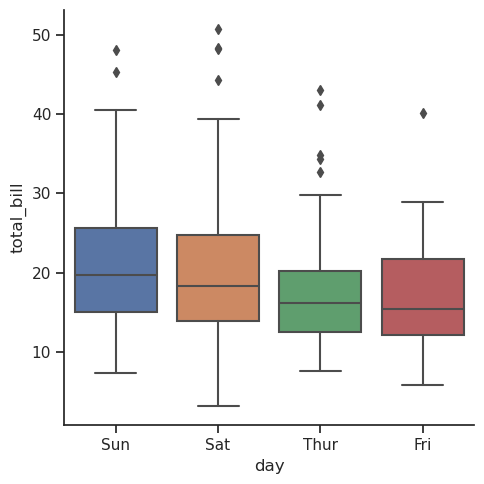

In [34]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

> When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

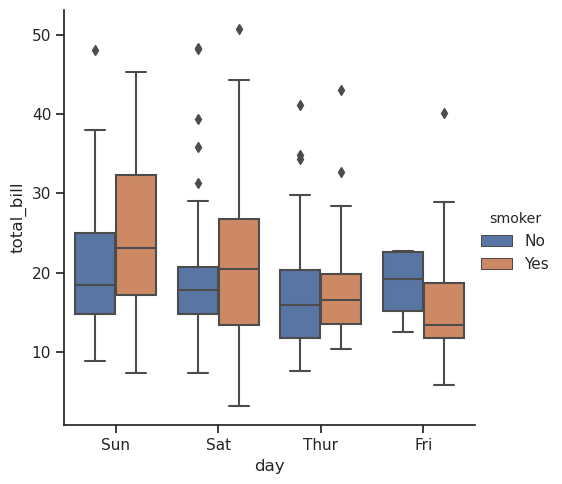

In [35]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

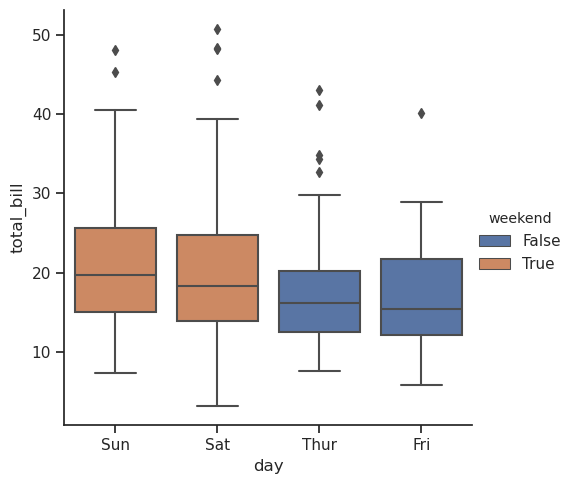

In [36]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

> A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

### Violinplots



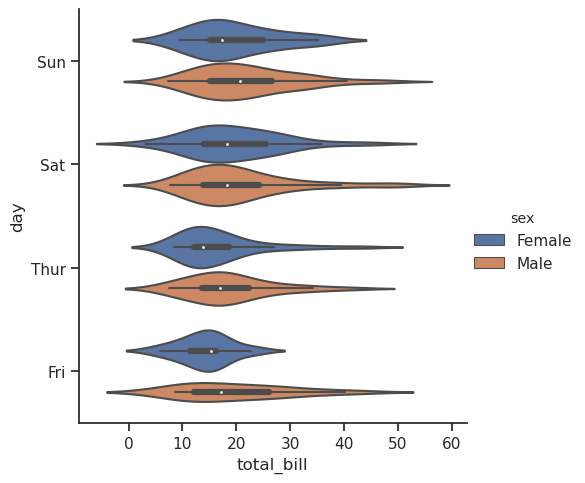

In [38]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

> It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

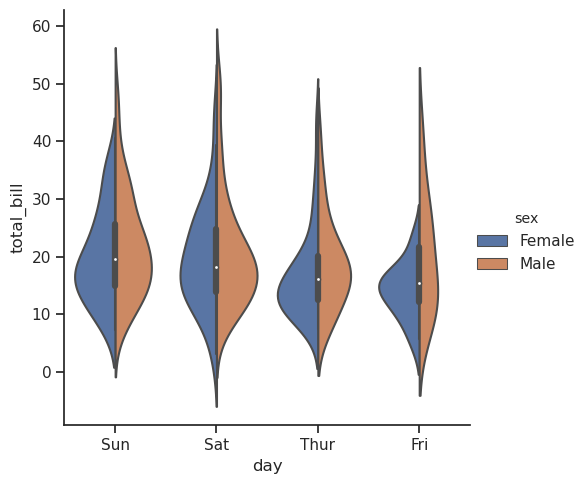

In [39]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

> It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

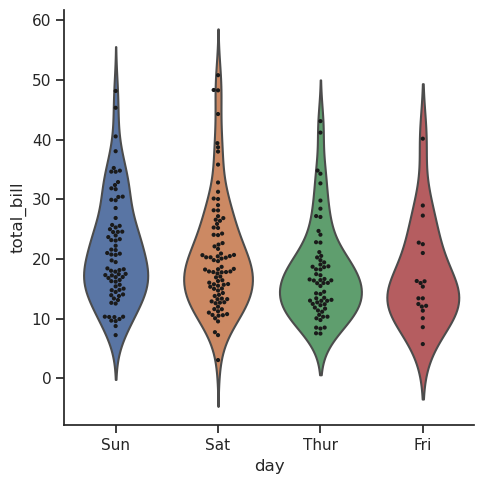

In [41]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

### Bar plots



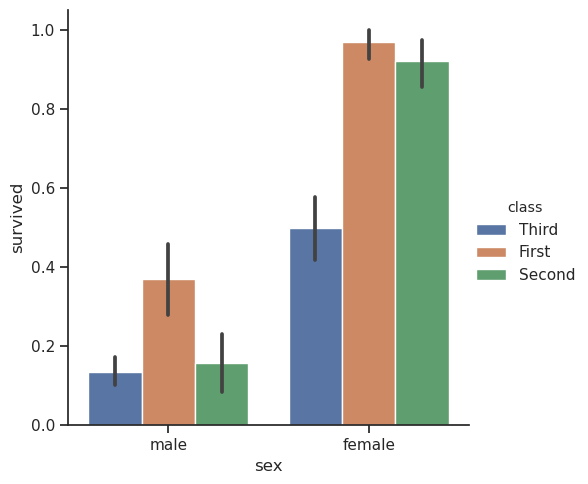

In [42]:
titanic = pd.read_csv('../input/myprivatedata/titanic.csv')
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

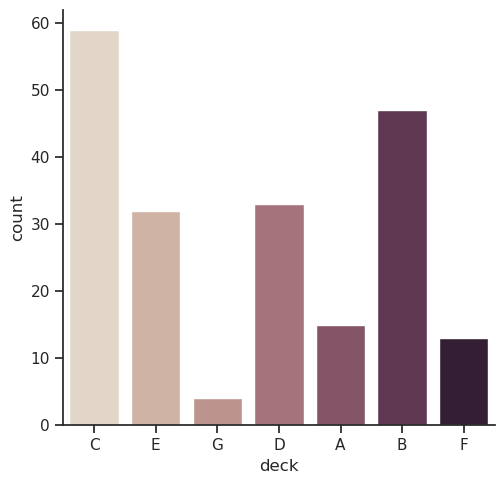

In [43]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

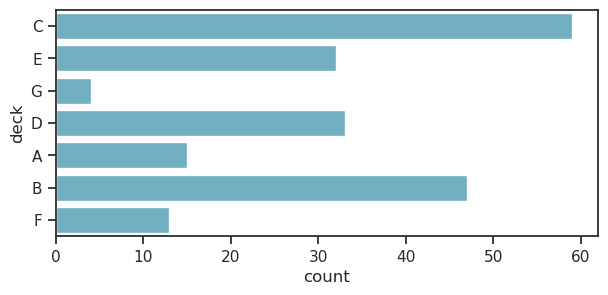

In [49]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

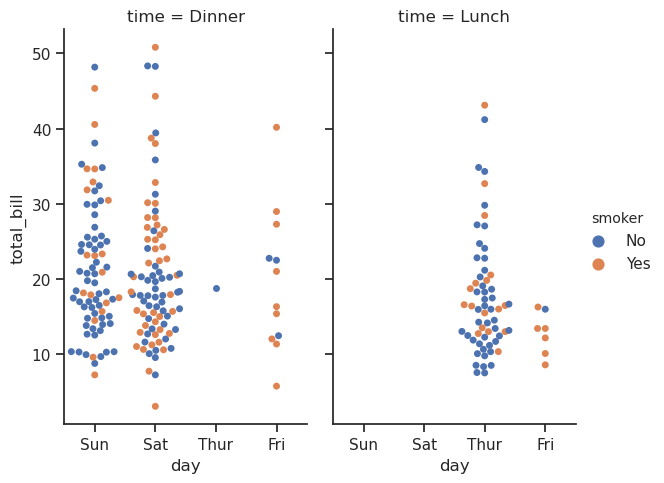

In [50]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

## Histograms


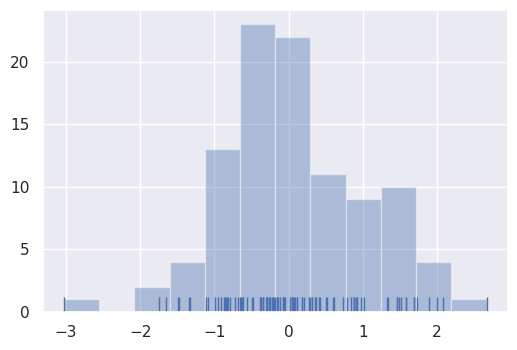

In [54]:
sns.distplot(x, kde=False, rug=True);

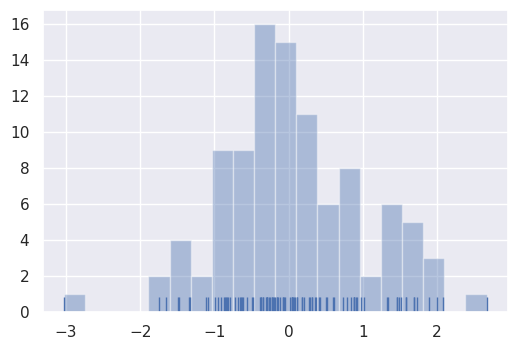

In [55]:
sns.distplot(x, bins=20, kde=False, rug=True);

## Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.

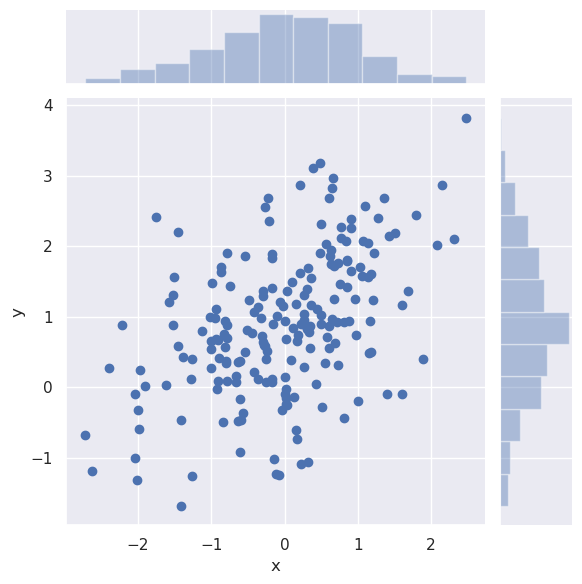

In [63]:
sns.jointplot(x="x", y="y", data=df);

# Linear Relationships



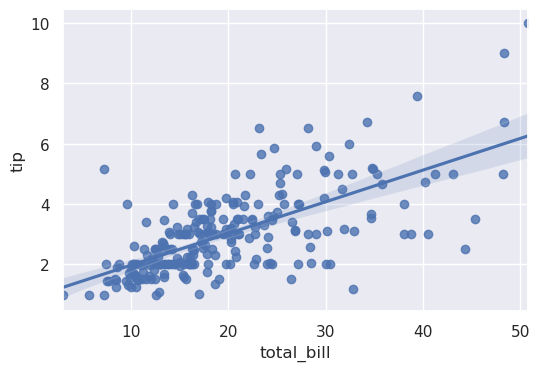

In [72]:
sns.regplot(x="total_bill", y="tip", data=tips);

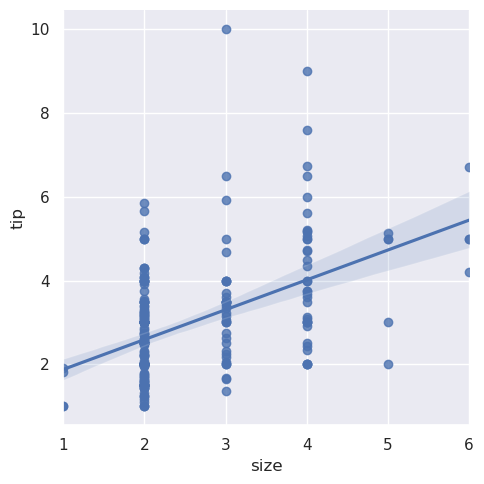

In [73]:
sns.lmplot(x="size", y="tip", data=tips);

> A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

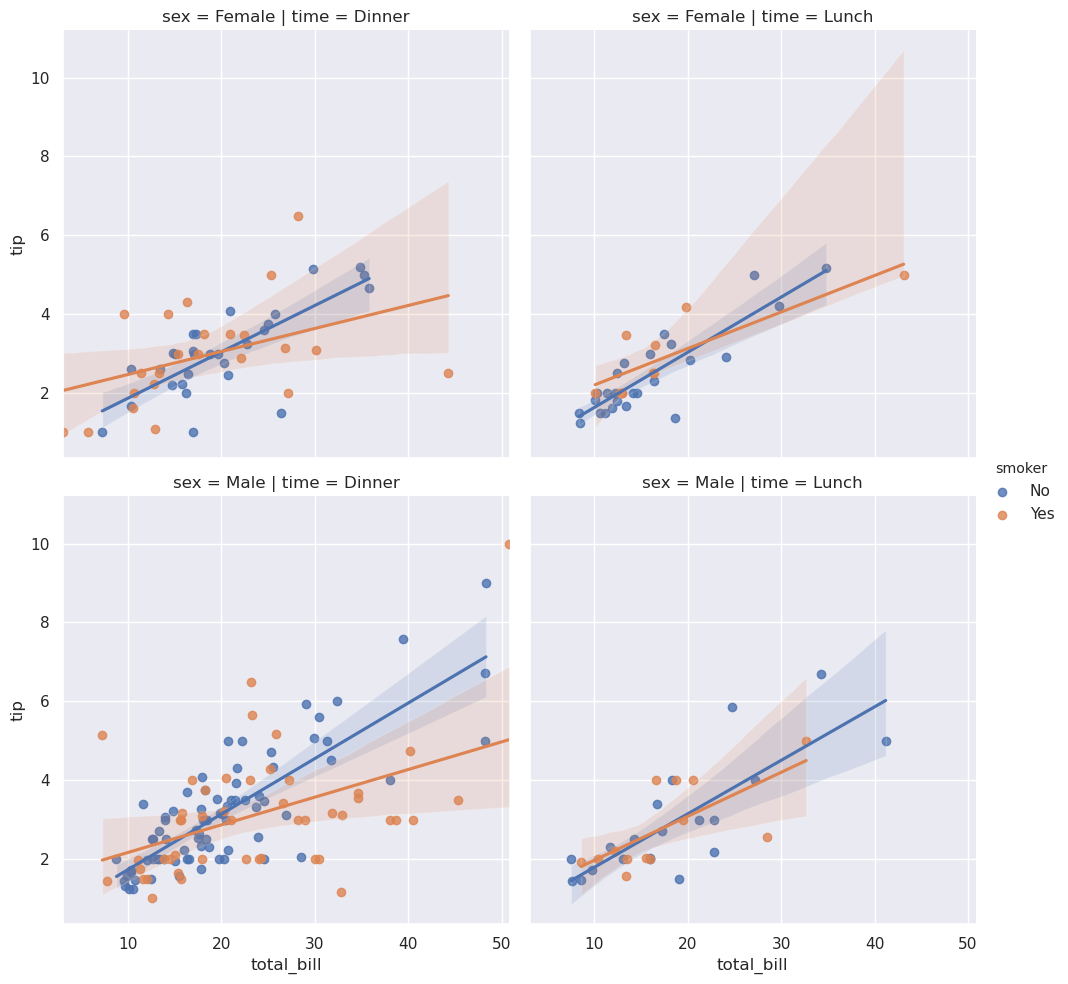

In [89]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

In [93]:
sns.set(style="ticks")

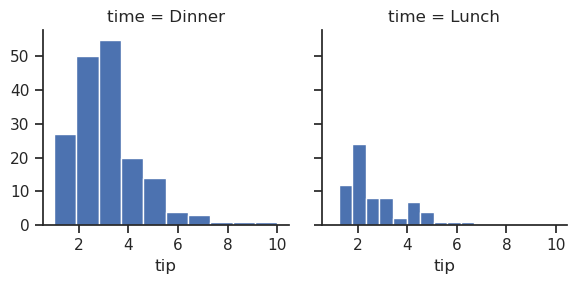

In [95]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

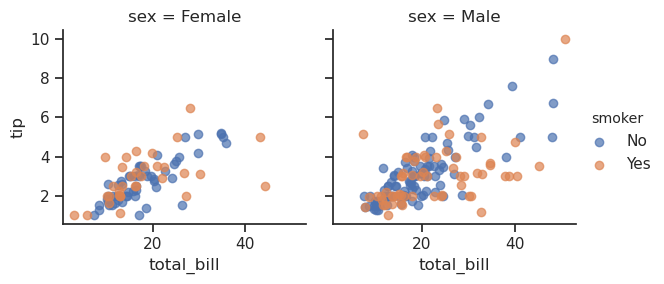

In [96]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

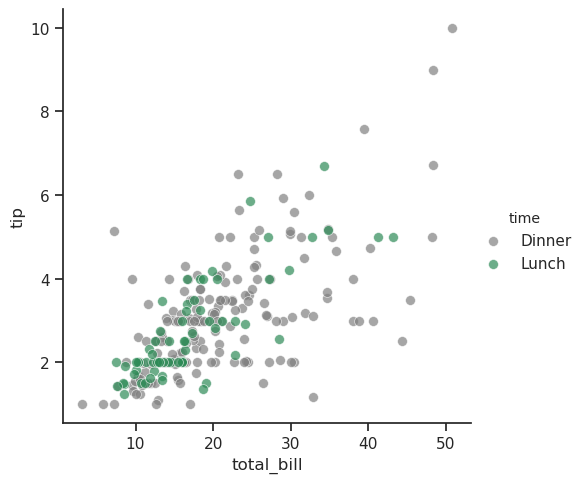

In [100]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

> You can also let other aspects of the plot vary across levels of the hue variable, which can be helpful for making plots that will be more comprehensible when printed in black-and-white. To do this, pass a dictionary to hue_kws where keys are the names of plotting function keyword arguments and values are lists of keyword values, one for each level of the hue variable.

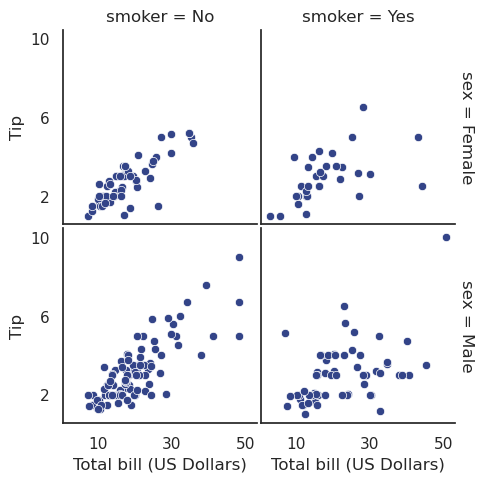

In [103]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);